In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('Financials.csv')
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [31]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [32]:
#Loại bỏ các khoảng trắng đầu/cuối của các tên cột
df.columns = df.columns.str.strip()
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [33]:
def convert_parentheses(val):
    if isinstance(val, str):
        if val.startswith('(') and val.endswith(')'): # () biểu thị các giá trị âm trong kế toán hoặc các hệ thống khác
            return -float(val[1:-1].replace(',', ''))  #biến đổi giá trị thành số âm
        else:
            return float(val)
    else:
        return val # Nếu val không phải là chuỗi, hàm trả về giá trị gốc

In [34]:
#Những cột có giá trị là số cần chuyển đổi
columns_to_clean = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

In [35]:
# Remove '$', '-' and ',' from the columns, convert values in parentheses to negative numbers, convert empty strings to NaN, and then convert to float
for col in columns_to_clean:
    if df[col].dtype == 'object': # xem dữ liệu trong cột có kiểu chuỗi không?
        df[col] = df[col].str.replace('$', '').str.replace('-', '').str.replace(',', '').str.strip()
        df[col] = df[col].replace('', np.nan).apply(convert_parentheses).astype(float)

# Chuyển đổi các giá trị trong cột 'Date' sang kiểu dữ liệu datetime
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


In [36]:
df.to_csv('Finance.csv', index=False)

### **Biểu đồ hiển thị mối quan hệ giữa doanh số bán hàng (Sales) và lợi nhuận (Profit) theo thời gian.**

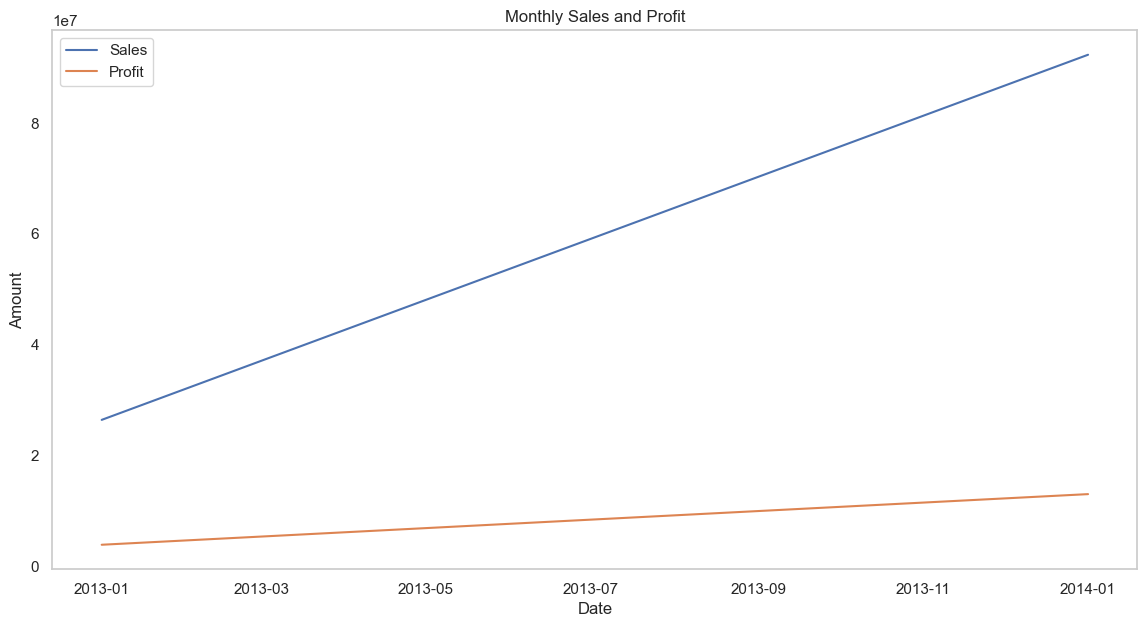

In [21]:
# Create a new dataframe with total monthly sales and profit
monthly_data = df.groupby([df['Date'].dt.year, df['Date'].dt.month]).agg({'Sales': 'sum', 'Profit': 'sum'})
monthly_data.index.names = ['Year', 'Month']
monthly_data.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_data['Year-Month'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))

# Plot monthly sales and profit
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Year-Month'], monthly_data['Sales'], label='Sales')
plt.plot(monthly_data['Year-Month'], monthly_data['Profit'], label='Profit')
plt.title('Monthly Sales and Profit')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

### **2 biểu đồ cột (bar charts) hiển thị doanh số (Sales) và lợi nhuận (Profit) theo từng phân khúc (Segment).**

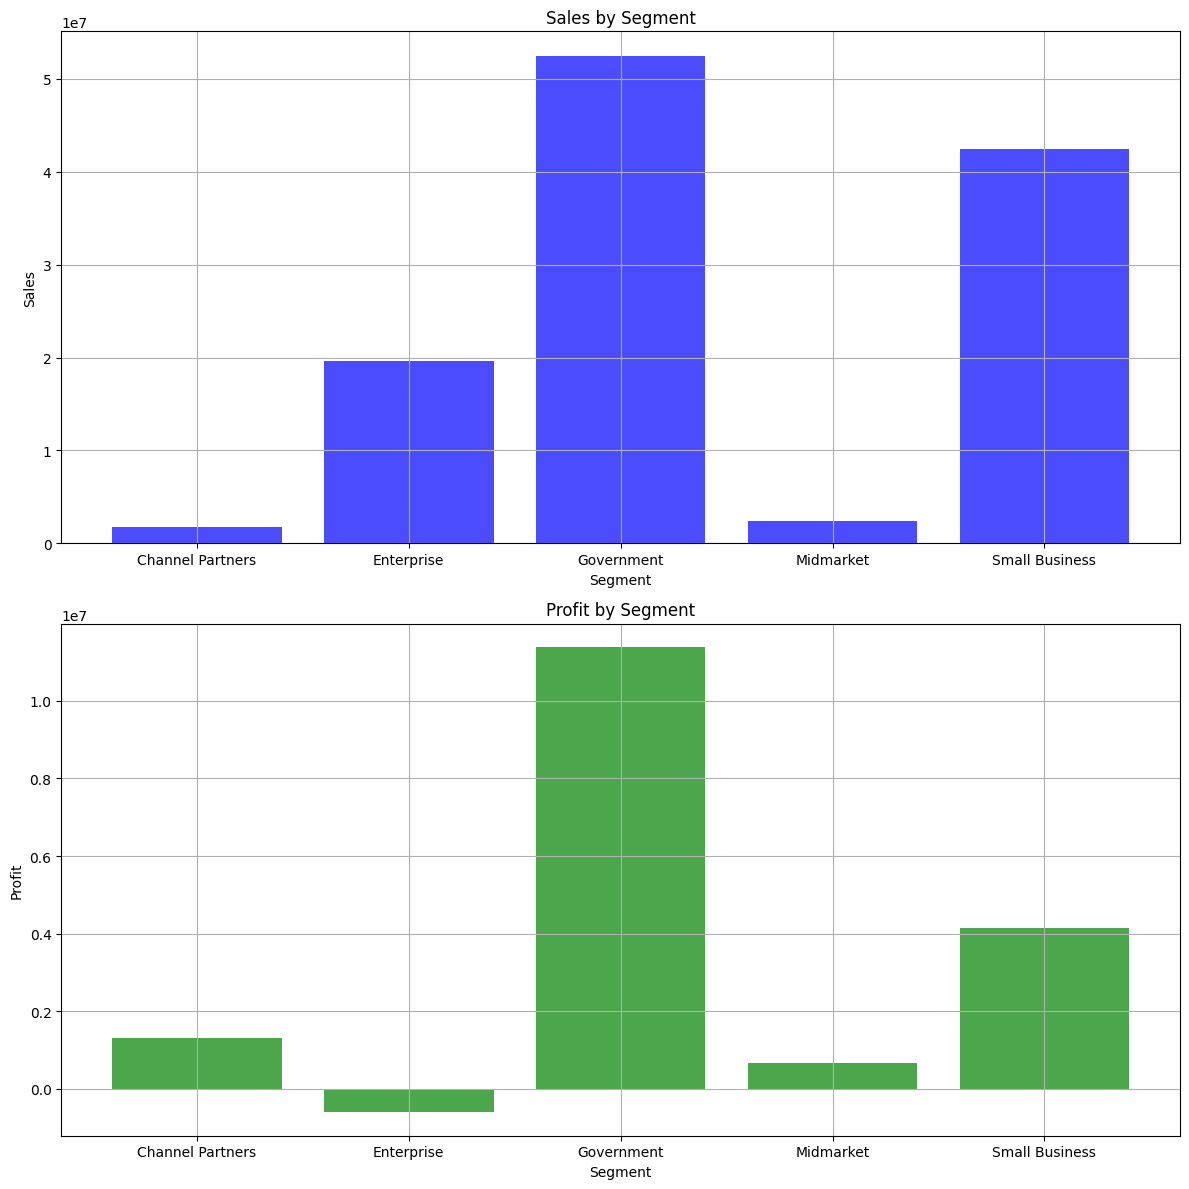

In [15]:
grouped_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'})

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(grouped_segment.index, grouped_segment['Sales'], color='blue', alpha=0.7)
ax[0].set_title('Sales by Segment')
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Sales')
ax[0].grid()

ax[1].bar(grouped_segment.index, grouped_segment['Profit'], color='green', alpha=0.7)
ax[1].set_title('Profit by Segment')
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('Profit')
ax[1].grid()

plt.tight_layout()
plt.show()

### ***2 biểu đồ doanh số và lợi nhuận theo từng phân khúc của các quốc gia***

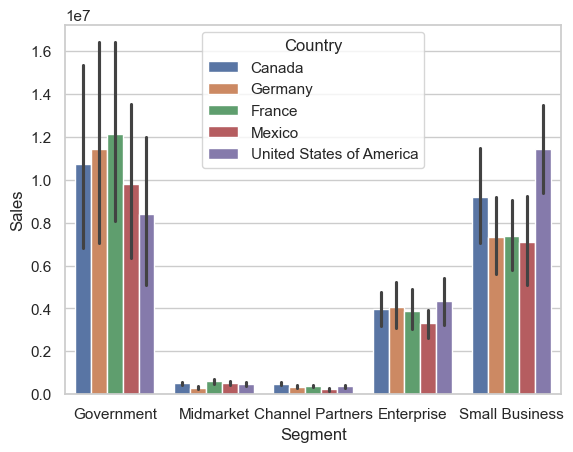

In [18]:
sns.set_theme(style="whitegrid")
sale_seg_country = sns.barplot(
    data = df, 
    x = df.Segment, 
    y = df['Sales'], 
    hue='Country', 
    estimator=sum,   
)
plt.show()

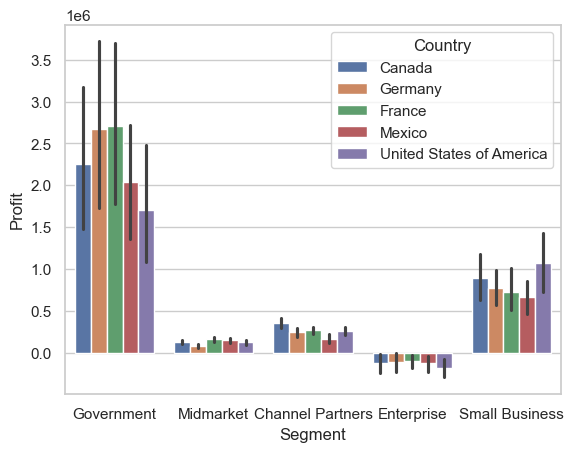

In [20]:
sns.set_theme(style="whitegrid")
profit_seg_country = sns.barplot(
    data = df, 
    x = df.Segment, 
    y = df['Profit'], 
    hue='Country', 
    estimator=sum,   
)
plt.show()

### **Biểu đồ so sánh lợi nhuận, tổng chi phí và doanh số cho mỗi product**

Text(0.5, 1.0, 'Profit_COGS_Sale per Product')

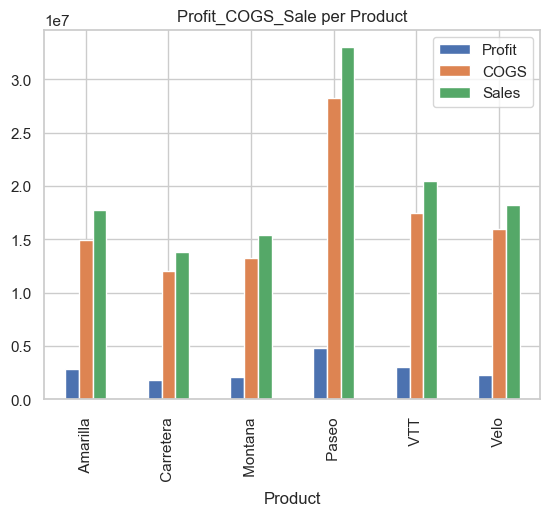

In [22]:
product_data = df.groupby('Product').agg({'Profit':'sum', 'Sales':'sum', 'COGS':'sum', 'Units Sold':'sum'})
product_data[['Profit','COGS', 'Sales']].plot(kind='bar')
plt.title('Profit_COGS_Sale per Product')

## **Các mối quan hệ giữa các đặc trưng.**

 Mối quan hệ giữa Units Sold (sản phẩm bán ra) và Profit (lợi nhuận).

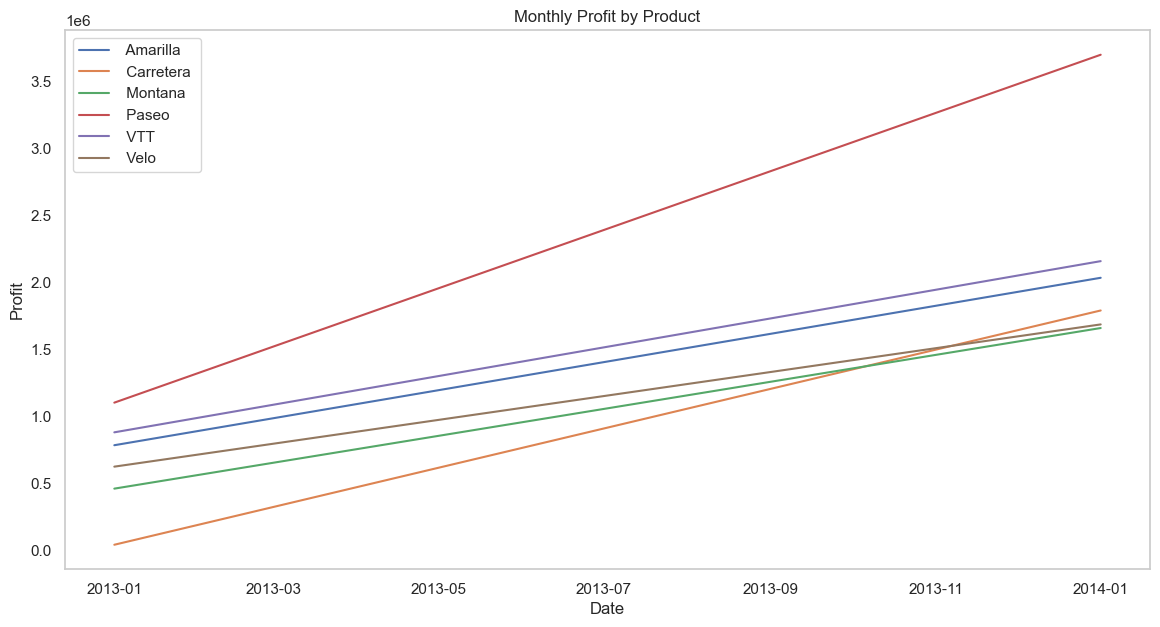

In [23]:
monthly_product_profit = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Product']).agg({'Profit': 'sum'})
monthly_product_profit.index.names = ['Year', 'Month', 'Product']
monthly_product_profit.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_product_profit['Year-Month'] = pd.to_datetime(monthly_product_profit[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(14, 7))
for product in monthly_product_profit['Product'].unique():
    product_data = monthly_product_profit[monthly_product_profit['Product'] == product]
    plt.plot(product_data['Year-Month'], product_data['Profit'], label=product)
plt.title('Monthly Profit by Product')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

 Mối quan hệ giữa Sales (doanh số) và Discounts (giảm giá).

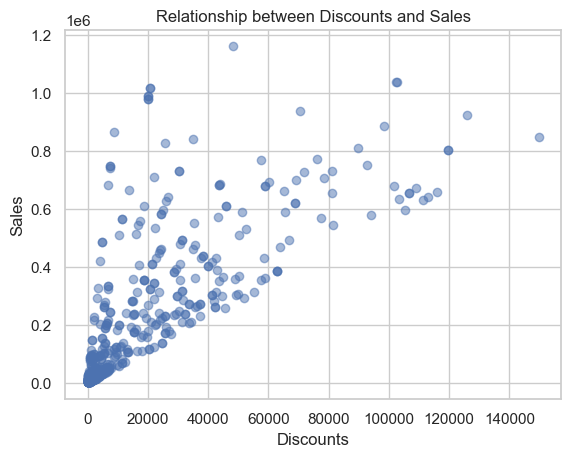

In [25]:
plt.scatter(df['Discounts'], df['Sales'], alpha=0.5)
plt.title('Relationship between Discounts and Sales')
plt.xlabel('Discounts')
plt.ylabel('Sales')
plt.show()

Sale Price (giá bán) và Manufacturing Price (giá sản xuất).

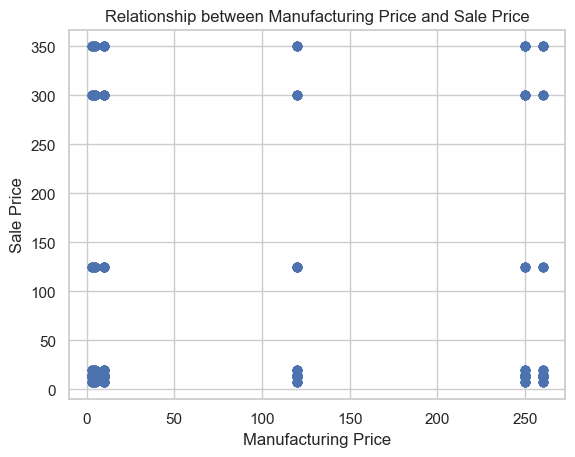

In [26]:
plt.scatter(df['Manufacturing Price'], df['Sale Price'], alpha=0.5)
plt.title('Relationship between Manufacturing Price and Sale Price')
plt.xlabel('Manufacturing Price')
plt.ylabel('Sale Price')
plt.show()